<h3 style="background-color: #F7F7F7; color: blue; padding: 10px;">
    2d AttId Grid Plots
</h3>


In [1]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
import os
from hom import compute_cube_labels, plot_hom, write_cube_labels

In [2]:
system = 8                  # [1,2,3,4,5,6,7,8,10,11]
num_of_pts = 1000            # [10, 100, 1000, 10000]
num_points_per_dim = 13      # User Choice

In [3]:
path = f'systems/{system}/{num_of_pts}pts/'
path_out = path + str(num_points_per_dim) + 'gppd/'

isExist = os.path.exists(path)
if not(isExist):
    print('The data for this system / number of points does not exist. Run make_data.py to create data.')
else:
    with open(path + 'exp_info.pickle', 'rb') as handle:
        exp_info = pickle.load(handle)
    domain = exp_info['domain']
    print(exp_info)
    print('Number of Boxes = ', (num_points_per_dim-1)**exp_info['dim'])

{'system': 8, 'num_of_pts': 1000, 'domain': ((0, 3.062), (0, 4.072), (0, 11.263620000000001)), 'dim': 3, 'step_size': 1, 'eps': 0.001, 'max_iter': 100, 'norm': False, 'delay': False, 'delay_iter': 3, 'resolution': 0.6258, 'n_components': 4}
Number of Boxes =  1728


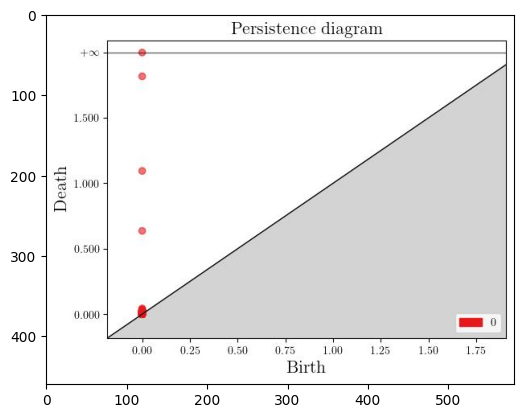

A resolution of 0.6258 was used which yeilded 4 connected components in the graph


In [4]:
if system!=9:
    PD_img = mpimg.imread(path + f'PD.jpg')
    imgplot = plt.imshow(PD_img)
    plt.show()
    print('A resolution of', exp_info['resolution'], 'was used which yeilded', exp_info['n_components'], 'connected components in the graph')

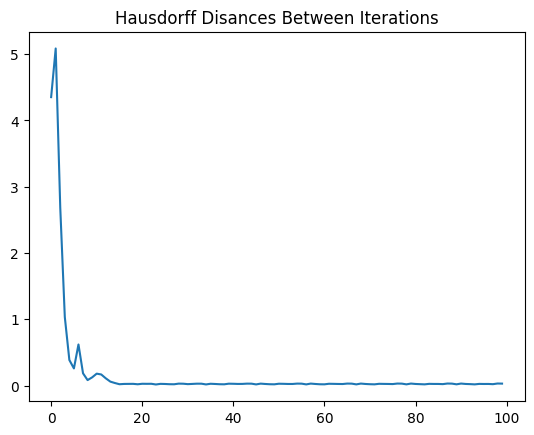

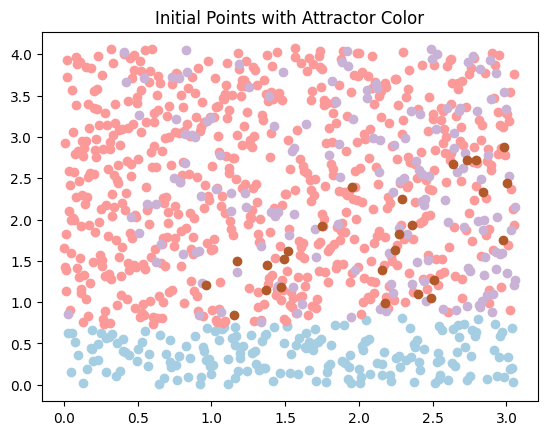

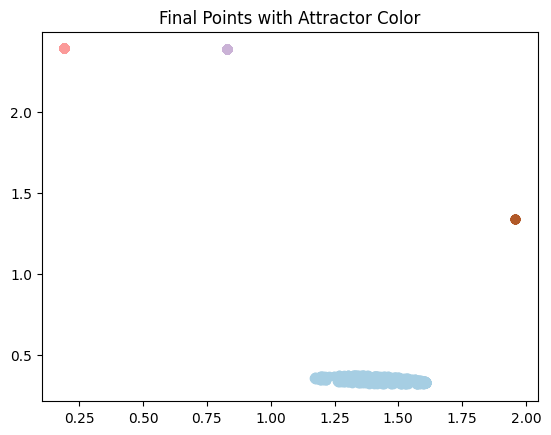

In [5]:
if system!=9:
     %run plot_data.py {system} {num_of_pts}

Score on test set: 0.99
[[14  0  0  0]
 [ 0 68  0  0]
 [ 0  0 15  0]
 [ 0  0  1  2]]


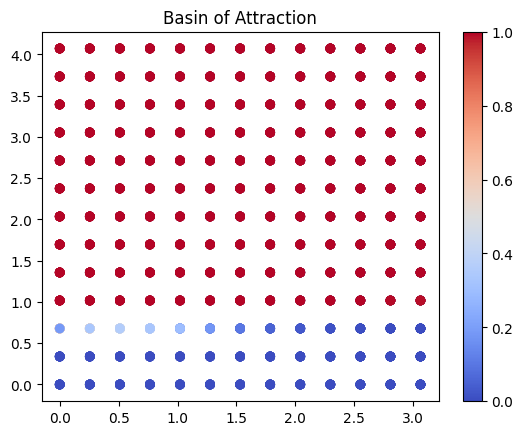

In [6]:
%run analyze_data.py {system} {num_of_pts} {num_points_per_dim}

In [7]:
data_on_grid=np.loadtxt(path_out + 'data_on_grid.csv', delimiter=',')
df=pd.read_csv(path_out + 'data_on_grid.csv', delimiter=',', header=None)  
#df.describe()     

In [8]:
dim = exp_info['dim']
N = int(num_points_per_dim) 
X = [np.linspace(domain[i][0],domain[i][1],N) for i in range(dim)]

In [9]:
cube_labels = compute_cube_labels(data_on_grid, N, dim)

Box counts for each attractor and the separatrix
[258, 913, 147, 10, 400, 0]
% of total boxes each attractor and the separatrix
[0.0258 0.0913 0.0147 0.001  0.04   0.    ]


In [10]:
#plot_hom(cube_labels, ((-20, 20), (-20, 20), (5, 5)), N, X)

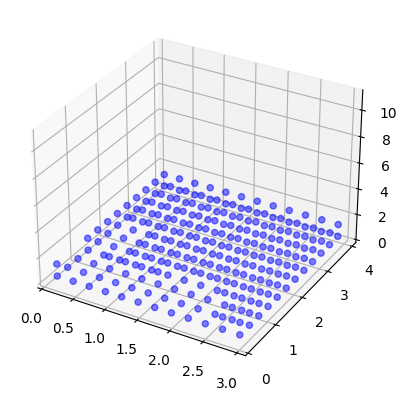

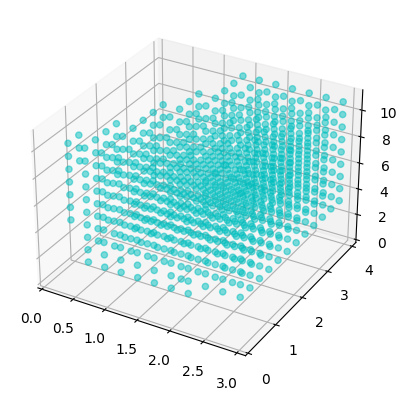

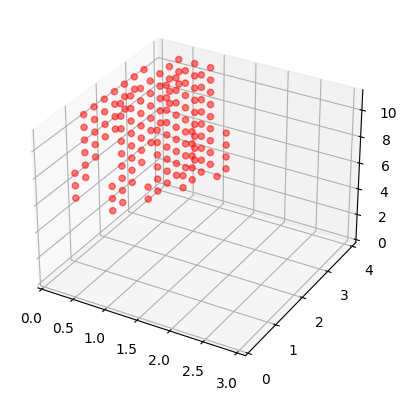

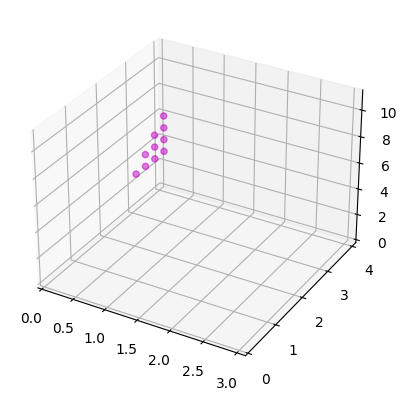

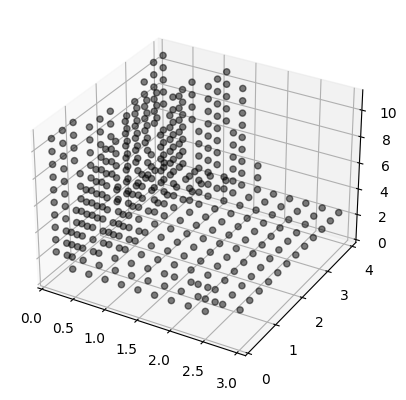

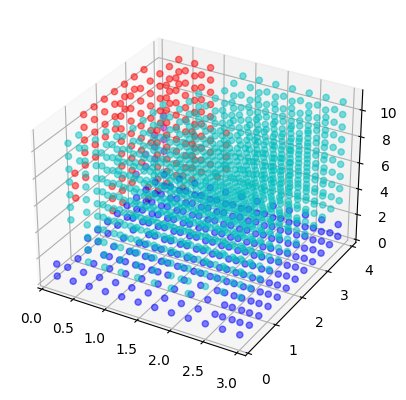

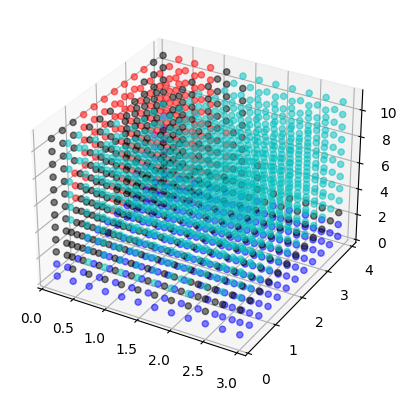

In [11]:
plot_hom(cube_labels, domain, N, X)

In [12]:
write_cube_labels(cube_labels, dim, N, path_out)

In [13]:
!./homcubes {path_out}/att0.txt

zsh:1: no such file or directory: ./homcubes


In [14]:
!./homcubes {path_out}/att1.txt

zsh:1: no such file or directory: ./homcubes


In [15]:
!./homcubes {path_out}/att2.txt

zsh:1: no such file or directory: ./homcubes


In [16]:
!./homcubes {path_out}/att3.txt

zsh:1: no such file or directory: ./homcubes


In [17]:
!./homcubes {path_out}/sep.txt

zsh:1: no such file or directory: ./homcubes


In [18]:
import pychomp#2 as pychomp
import os
filenames = []
for file in os.listdir(path_out):
    if file.startswith("att") or file.startswith("sep"):
        filenames.append(os.path.join(path_out, file))

homology = []
for fname in filenames:
    with open(fname) as f:
        lines = f.readlines()
        cubes = [eval(elem) for elem in lines]
        if len(cubes) != 0:
            hom = pychomp.CubicalHomology(cubes)
        else:
            hom = None
        homology.append(hom)
homology = [i for i in homology if i is not None]

In [19]:
print(homology)
with open(path_out + 'homology.txt','w') as hom:
    hom.write(str(homology))

[[1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0]]
